# 1、收集

#### 从互联网下载数据 导入requests库通过url编程下载

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
urls=['https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv',
    'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv',
     'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt']

In [3]:
#下载文件到Data文件夹目录下
folder = 'Data'
if not os.path.exists(folder):
    os.makedirs(folder)
    
for url in urls:
    response=requests.get(url)
    with open(os.path.join(folder,url.split('/')[-1]),mode='wb') as file:
         file.write(response.content)

In [4]:
#读取json文件到DataFrame
f= open('Data/tweet_json.txt')
df_list=[]
for line in f.readlines():
    line=line.strip()
    line= json.loads(line)
    varible={'id','favorite_count','retweeted','retweet_count'}
    dict1={key:value for key,value in line.items()if key in varible}
    df_list.append(dict1)
tweet_json=pd.DataFrame(df_list,columns=['id','favorite_count','retweet_count','retweeted'])
tweet=pd.read_csv('Data/twitter-archive-enhanced.csv')#读取文件夹Data目录下的文件twitter-archive-enhanced.csv
predictions=pd.read_csv('Data/image-predictions.tsv',sep='\t')

# 2、评估
## 2.1目测评估

In [5]:
tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
tweet_json

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,39492,8842,False
1,892177421306343426,33786,6480,False
2,891815181378084864,25445,4301,False
3,891689557279858688,42863,8925,False
4,891327558926688256,41016,9721,False
5,891087950875897856,20548,3240,False
6,890971913173991426,12053,2142,False
7,890729181411237888,66596,19548,False
8,890609185150312448,28187,4403,False
9,890240255349198849,32467,7684,False


## 2.2编程评估

In [8]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 4 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
retweeted         2352 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.5 KB


In [11]:
# 检查重复的列名
all_columns=pd.Series(list(tweet)+list(predictions)+list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [12]:
tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,8109.198980,3134.932398
std,6.846210e+16,11980.795669,5237.846296
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,1417.000000,618.000000
50%,7.193536e+17,3596.500000,1456.500000
75%,7.991219e+17,10118.000000,3628.750000
max,8.924206e+17,132318.000000,79116.000000


In [15]:
tweet.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Bailey            7
Toby              7
an                7
Buddy             7
Daisy             7
Stanley           6
Milo              6
Scout             6
Jack              6
Jax               6
Rusty             6
Dave              6
Oscar             6
Bella             6
Koda              6
Leo               6
Louis             5
               ... 
Severus           1
Hero              1
Alexanderson      1
Ozzie             1
Ralf              1
Aqua              1
Autumn            1
Lilli             1
Sojourner         1
Rorie             1
Zeek              1
Colin             1
Blipson           1
Philippe          1
Stuart            1
life              1
infuriating       1
Storkson          1
Batdog            1


In [16]:
tweet.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### 分母评分不都是10

### 质量
#### `tweet` 表格


1. 狗的名字name数据不正确，有None、a、an等非名字的字符  
 【处理:正则表达式重新提取】
2. 有转发的数据retweeted_status_user_id列中有非空181条  
 【处理：删除】
3. 狗的评分数据部分不准确  
 【处理：重新提取】
4. 评分数据分母不一致，不方便比较    
 【处理：统一计算为以10为分母】
5. tweet_id数据类型是整型  
 【处理：修改为字符串型】
 
#### `predictions` 表格  
1. tweet数据2356个而predictions中2079个，说明有些狗没有图片   
 【处理：合并两个数据集就能得到都是有图片的数据】
2. 预测图片不是狗  
 【处理：合并图片预测数据，提取预测结果是狗的数据】 

#### `tweet_json` 表格  
1. tweet_json表格中变量名id与其他表格中的变量名tweet_id不一致  
 【处理：修改为tweet_id】

### 清洁度
1. `tweet` 表格中的狗的地位doggo,pupper,puppo,floofer是同一属性的变量，而不是4个变量却占用了4列  
 【处理：将4列合并为一个变量，变量名为：status】
2. `tweet_json` 表格中的retweet_count和favorite_count两列是tweet表格中的一部分  
 【处理：合并到 `tweet` 表格中】

# 3、清洗

### wrangle_act.ipynb：用于收集、评估、清洗、分析和可视化数据的代码 
wrangle_report.pdf：汇总数据整理步骤的文档：收集，评估和清洗   
act_report.pdf：对最终数据进行观察与分析的文档

twitter_archive_enhanced.csv：给定的文件   
image_predictions.tsv：以编程方式下载的文件   
tweet_json.txt：通过 API 构建的文件

twitter_archive_master.csv：合并与清洗后的数据   
其他附加文件（例如，用于存储干净数据的附加文件或数据库文件）  

In [17]:
tweet_clean=tweet.copy()
predictions_clean=predictions.copy()
tweet_json_clean=tweet_json.copy()

## 缺失数据

### `tweet`：缺少记录 (name、评级数据重新提取)

#### 定义
使用正则表达式从tweet表格text中重新提取name、评级数据

#### 代码

In [18]:
tweet_clean.name=tweet_clean.text.str.extract('(?:This is|Meet|name is|Say hello to|named|Named) ([A-Z][a-z]+)\.',expand=True)

#### 测试

In [19]:
tweet_clean.name.value_counts()

Charlie       12
Cooper        11
Oliver        10
Lola          10
Tucker        10
Lucy          10
Penny          9
Winston        9
Bo             7
Bailey         7
Daisy          7
Buddy          7
Toby           7
Sadie          6
Koda           6
Scout          6
Rusty          6
Leo            6
Stanley        6
Bella          6
Louis          5
Gus            5
Larry          5
Phil           5
Oscar          5
Milo           5
Finn           5
Sammy          5
Dave           5
Jax            5
              ..
Ozzie          1
Kramer         1
Ralf           1
Hermione       1
Guss           1
Alfredo        1
Miley          1
Mack           1
Jersey         1
Chuk           1
Ralphie        1
Storkson       1
Sojourner      1
Batdog         1
Jeffri         1
Kane           1
Rhino          1
Augie          1
Tess           1
Wafer          1
Donny          1
Crumpet        1
Brandonald     1
Kara           1
Autumn         1
Sephie         1
Aqua           1
Mike          

In [20]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1423 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

###  `tweet`表格中 一个变量占用4列

#### 定义
`tweet` 表格中的狗的地位doggo,pupper,puppo,floofer是同一属性的同一个变量，而不是4个变量却占用了4列，且数据不准确，重新提取并存储为status

#### 代码

In [21]:
tweet_clean=tweet_clean.iloc[:,0:13]# 删除doggo、floofer、pupper、puppo这4列
tweet_clean['status']=tweet_clean.text.str.lower().str.findall('(doggo|puppo|pupper|floof)')#将text中的字符转换为小写再进行正则匹配
tweet_clean['status']=tweet_clean['status'].apply(lambda x:','.join(set(x)))
tweet_clean['status'].replace('', np.nan, inplace=True)

In [22]:
tweet_clean.status.value_counts()

pupper          270
doggo            90
floof            37
puppo            36
pupper,doggo     12
floof,doggo       3
doggo,puppo       2
floof,pupper      1
Name: status, dtype: int64

In [23]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1423 non-null object
status                        451 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### `tweet`：评级数据不准确

#### 定义
tweet表格中评级数据有些有两个值，需要重新提取，如果提取多个值则取均值作为最终评分

#### 代码

In [24]:
fenzi=tweet_clean.text.map(lambda x:re.findall('(\d+\.?\d*)\/\d+',x))
fenmu=tweet_clean.text.map(lambda x:re.findall('\d+\.?\d*\/(\d+)',x))
def trans(x):
    x=list(map(float,x))
    return sum(x)/len(x)
tweet_clean.rating_numerator=fenzi.apply(trans)
tweet_clean.rating_denominator=fenmu.apply(trans)

#### 测试

In [25]:
tweet_clean.loc[:,['rating_numerator','rating_denominator']].head()

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0


In [26]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1423 non-null object
status                        451 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 257.8+ KB


### `tweet`：删除转发数据

#### 定义
retweeted_status_user_id列中有181条是转发的数据，删除转发的数据

#### 代码

In [27]:
tweet_clean=tweet_clean[tweet_clean.retweeted_status_user_id.isnull()]#删除转发的数据
#tweet_clean=tweet_clean[tweet_clean.in_reply_to_user_id.isnull()]#删除回复的数据

#### 测试

In [28]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1316 non-null object
status                        412 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 254.9+ KB


### `tweet`：删除没有狗的照片的数据

#### 定义
predictions表格都是有狗的图片的数据2079个，tweet有2356个数据，通过合并predictions和tweet表格删除没有狗的照片的数据

#### 代码

In [29]:
tweet_clean=pd.merge(tweet_clean,predictions_clean,on='tweet_id',how='inner')

#### 测试

In [30]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1275 non-null object
status                        369 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       1994 n

In [31]:
tweet_clean[tweet_clean.rating_numerator==1776].jpg_url#查看评分最高1776的狗的照片地址

726    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

## 清洁度


###  `tweet_json` 表格是`tweet`的一部分

#### 定义
`tweet_json` 表格中的retweet_count和favorite_count两列是tweet表格中的一部分，将其合并到 `tweet` 表格中

#### 代码

In [32]:
#查看tweet表格的列标签和索引
for i,v in enumerate(tweet_clean.columns):
    print(i,v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 status
14 jpg_url
15 img_num
16 p1
17 p1_conf
18 p1_dog
19 p2
20 p2_conf
21 p2_dog
22 p3
23 p3_conf
24 p3_dog


In [33]:
df1=tweet_clean.iloc[:,np.r_[0,10:14]]# 提取有用信息的列
df3=tweet_json_clean.rename(columns={'id':'tweet_id'})#tweet_json表格中id变量名修改为tweet_id
df_clean=pd.merge(df1,df3,on='tweet_id',how='left')

#### 测试

In [34]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,status,favorite_count,retweet_count,retweeted
0,892420643555336193,13.0,10.0,Phineas,NaN,39492,8842,False
1,892177421306343426,13.0,10.0,Tilly,NaN,33786,6480,False
2,891815181378084864,12.0,10.0,Archie,NaN,25445,4301,False
3,891689557279858688,13.0,10.0,Darla,NaN,42863,8925,False
4,891327558926688256,12.0,10.0,Franklin,NaN,41016,9721,False


In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 8 columns):
tweet_id              1994 non-null int64
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1275 non-null object
status                369 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
retweeted             1994 non-null bool
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 126.6+ KB


### `tweet`：评分数据中分母不一致

#### 定义
将评级数据中分母不为10的统一计算为以10为分母

#### 代码

In [36]:
df_clean['rating_numerator']=(df_clean.rating_numerator/df_clean.rating_denominator)*10 #计算rating_numerator的值并重新赋值
df_clean.rating_numerator=df_clean.rating_numerator.astype(float) #将rating_numerator类型转换为浮点型
df_clean.rating_denominator=10  #把rating_denominator列的值改为10

#### 测试

In [37]:
df_clean.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 8 columns):
tweet_id              1994 non-null int64
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1275 non-null object
status                369 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
retweeted             1994 non-null bool
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 126.6+ KB


### `predictions`：预测图片有些不是狗

#### 定义
删选预测结果是狗的数据

#### 代码

In [39]:
predictions_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [40]:
df2_p1=predictions_clean[predictions_clean.img_num==1]
df2_p2=predictions_clean[predictions_clean.img_num==2]
df2_p3=predictions_clean[predictions_clean.img_num==3]
df2_p1dog=df2_p1[df2_p1.p1_dog==1]
df2_p2dog=df2_p2[df2_p2.p2_dog==1]
df2_p3dog=df2_p3[df2_p3.p3_dog==1]
df2_dog=pd.concat([df2_p1dog,df2_p2dog,df2_p3dog])#拼接数据中不包括预测图片结果是4号的数据

In [41]:
df2_dog.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
#合并数据集
df_clean=pd.merge(df_clean,df2_dog,on='tweet_id',how='inner')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 19 columns):
tweet_id              1465 non-null int64
rating_numerator      1465 non-null float64
rating_denominator    1465 non-null int64
name                  967 non-null object
status                273 non-null object
favorite_count        1465 non-null int64
retweet_count         1465 non-null int64
retweeted             1465 non-null bool
jpg_url               1465 non-null object
img_num               1465 non-null int64
p1                    1465 non-null object
p1_conf               1465 non-null float64
p1_dog                1465 non-null bool
p2                    1465 non-null object
p2_conf               1465 non-null float64
p2_dog                1465 non-null bool
p3                    1465 non-null object
p3_conf               1465 non-null float64
p3_dog                1465 non-null bool
dtypes: bool(4), float64(4), int64(5), object(6)
memory usage: 188.8+ KB


In [43]:
df_clean=df_clean.iloc[:,0:8]
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,status,favorite_count,retweet_count,retweeted
0,892177421306343426,13.0,10,Tilly,NaN,33786,6480,False
1,891815181378084864,12.0,10,Archie,NaN,25445,4301,False
2,891327558926688256,12.0,10,Franklin,NaN,41016,9721,False
3,891087950875897856,13.0,10,NaN,NaN,20548,3240,False
4,890971913173991426,13.0,10,Jax,NaN,12053,2142,False


### `tweet`：tweet_id数据类型是整型不是字符型

#### 定义
将tweet_id数据类型修改为字符串型

#### 代码

In [44]:
df_clean.tweet_id=df_clean.tweet_id.astype(str)

#### 测试

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 8 columns):
tweet_id              1465 non-null object
rating_numerator      1465 non-null float64
rating_denominator    1465 non-null int64
name                  967 non-null object
status                273 non-null object
favorite_count        1465 non-null int64
retweet_count         1465 non-null int64
retweeted             1465 non-null bool
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 93.0+ KB


In [46]:
#将清洗好的数据保存，文件名为df_clean
df_clean.to_csv('twitter_archive_master.csv')

# 可视化分析

In [47]:
x=df_clean.status.value_counts()
x

pupper          154
doggo            49
floof            33
puppo            25
pupper,doggo      8
doggo,puppo       2
floof,doggo       1
floof,pupper      1
Name: status, dtype: int64

([<matplotlib.patches.Wedge at 0x7efde6fdaf60>,
 [Text(-0.23003,1.12676,'pupper'),
  Text(-0.624871,-0.905282,'doggo'),
  Text(0.366293,-1.03722,'puppo'),
  Text(0.929709,-0.587912,'floof'),
  Text(1.08141,-0.201392,'pupper&doggo'),
  Text(1.09738,-0.07589,'puppo&doggo'),
  Text(1.09934,-0.0379675,'floof&doggo'),
  Text(1.09993,-0.0126579,'pupper&floof')],
 [Text(-0.130017,0.636864,'56.41%'),
  Text(-0.340839,-0.49379,'17.95%'),
  Text(0.199796,-0.565758,'12.09%'),
  Text(0.507114,-0.320679,'9.16%'),
  Text(0.589858,-0.10985,'2.93%'),
  Text(0.59857,-0.0413946,'0.73%'),
  Text(0.599642,-0.0207096,'0.37%'),
  Text(0.59996,-0.00690432,'0.37%')])

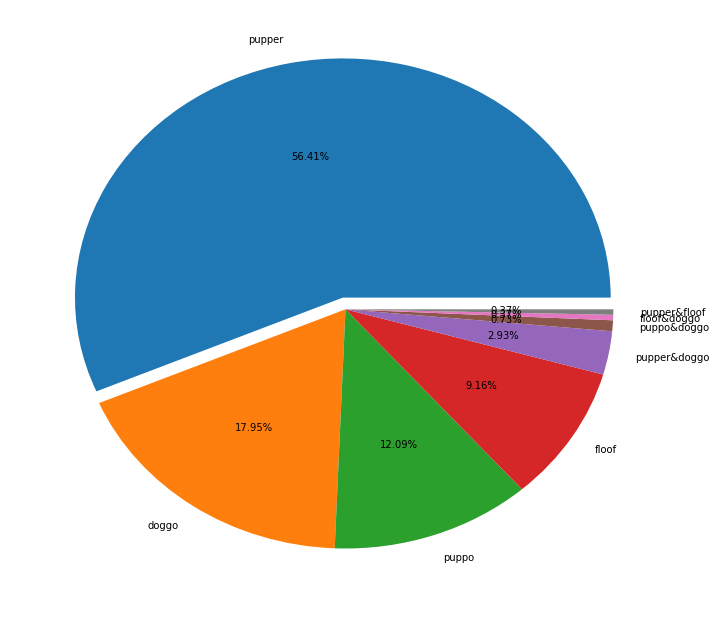

In [48]:
fig=plt.figure(figsize=(12,11))
labels=['pupper','doggo','puppo','floof','pupper&doggo','puppo&doggo','floof&doggo','pupper&floof']
expl=[0.05,0,0,0,0,0,0,0]
plt.pie(x,explode=expl,labels=labels,autopct='%1.2f%%')

### 人们养狗分布是：小狗(pupper)>大狗(doggo)>中型狗(puppo)>长毛狗(floofer)>其他  
### 从提取的273个有评级的推特中发现人们养的狗大半是小狗，占比56.41%，其次是大狗(doggo)、中型狗(puppo)、长毛狗(floofer)、其他狗

In [49]:
df_doggo=df_clean[df_clean.status=='doggo']
df_floofer=df_clean[df_clean.status=='floof']
df_pupper=df_clean[df_clean.status=='pupper']
df_puppo=df_clean[df_clean.status=='puppo']

In [50]:
x_doggo=df_doggo.favorite_count.mean()
x_floofer=df_floofer.favorite_count.mean()
x_pupper=df_pupper.favorite_count.mean()
x_puppo=df_puppo.favorite_count.mean()
y_doggo=df_doggo.retweet_count.mean()
y_floofer=df_floofer.retweet_count.mean()
y_pupper=df_pupper.retweet_count.mean()
y_puppo=df_puppo.retweet_count.mean()

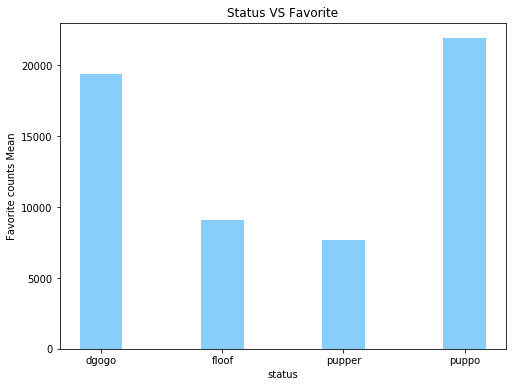

In [51]:
x_favorite=[x_doggo,x_floofer,x_pupper,x_puppo]
x_labels=['dgogo','floof','pupper','puppo']
fig=plt.figure(figsize=(8,6))
plt.xlabel('status')
plt.ylabel('Favorite counts Mean')
plt.title('Status VS Favorite')
plt.bar(x_labels,x_favorite,width=0.35,facecolor='lightskyblue');

### 上图显示最受人们欢迎的是中型狗(puppo)

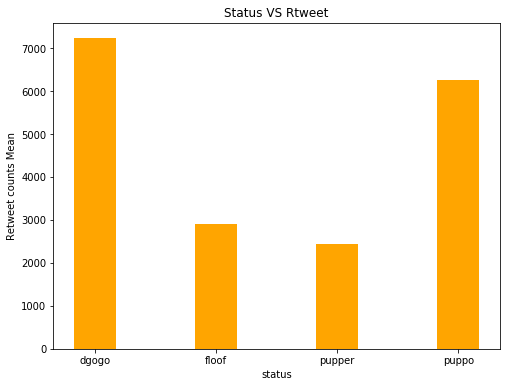

In [52]:
y_retweet=[y_doggo,y_floofer,y_pupper,y_puppo]
y_labels=['dgogo','floof','pupper','puppo']
fig=plt.figure(figsize=(8,6))
plt.xlabel('status')
plt.ylabel('Retweet counts Mean')
plt.title('Status VS Rtweet')
plt.bar(y_labels,y_retweet,width=0.35,fc='orange');

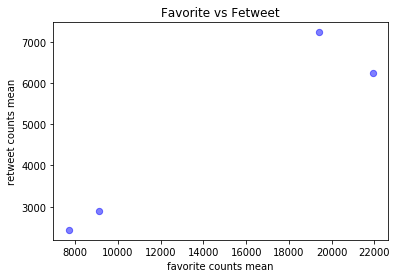

In [53]:
plt.title('Favorite vs Fetweet')
plt.xlabel('favorite counts mean')
plt.ylabel('retweet counts mean')
plt.scatter(x_favorite,y_retweet,s=40,c='blue',alpha=0.5,marker='o');